In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


In [2]:
#function to predict the class of a test data point
def predict(X, theta, threshold=0.5):
    return (hypothesis(X, theta) >= threshold).astype(int)

    

In [3]:
#function to calculate accuracy of the classifier
def accuracy(actual,predicted):
    return np.mean((actual == predicted).astype(int))

In [4]:
#function to calculate precision of the classifier
def precision(actual, predicted):
    TP = np.count_nonzero(np.logical_and((actual == 1) , (predicted ==1)).astype(int))
    FP = np.count_nonzero(np.logical_and((actual == 0) , (predicted ==1)).astype(int))
    return TP/(TP + FP)

In [5]:
#function to calculate recall of the classifier
def recall(actual, predicted):
    TP = np.count_nonzero(np.logical_and((actual == 1) , (predicted ==1)).astype(int))
    FN = np.count_nonzero(np.logical_and((actual == 1) , (predicted ==0)).astype(int))
    return TP/(TP + FN)

In [6]:
#function to calculate f-score of the classifier
def f_score(actual , predicted):
    P = precision(actual, predicted)
    R = recall(actual, predicted)
    return 2*P*R/(P + R)

In [7]:
#function to calculate sigmoid
def sigmoid(x):
    return 1/(1 + np.exp(-x) )

In [8]:
#hypothesis for logistic regression
def hypothesis(X,theta):
    return sigmoid(np.dot(X, theta))

In [9]:
#binary cross entropy cost function
def cost(X,y,theta):
    h = hypothesis(X,theta)
    return (-1/len(y))*(np.sum((y * np.log(h)) + (1-y)*np.log(1-h)))

   

In [10]:
#cost function for regularisation 
def cost_regularisation(X,y,theta,lambda_,norm='L1'):
    cost_without_regularisation = cost(X,y,theta)
    if norm=='L1':
        # return binary cross entropy cost with added term for sum of absolute values of weights
        return cost_without_regularisation + lambda_*(np.sum(np.absolute(theta)))
    elif norm=='L2':
        # return binary cross entropy cost with added term for sum of sqaures of weights
        return cost_without_regularisation + 0.5*lambda_*(np.sum(np.square(theta)))

In [11]:
#function to perform gradient descent for logistic regression (without regularisation)
def gradient_descent(X,y,theta,learning_rate,iterations):
    cost_history=np.zeros(iterations)
    m=len(y)
    for i in range(iterations):
        gradient = (1/m)* np.dot(X.transpose(), (hypothesis(X,theta)- y))
        #w=w-alpha*gradient
        theta = theta - learning_rate*gradient
        cost_history[i] = cost(X, y, theta)
        
    return theta,cost_history

In [12]:
#function to perform gradient descent with regularisation
def gradient_descent_regularisation(X,y,theta,learning_rate,iterations,lambda_, norm='L1'):
    cost_history=np.zeros(iterations)
    m=len(y)
    for i in range(iterations):
        gradient = ((1/m)* np.dot(X.transpose(), (hypothesis(X,theta)- y))) 
        if(norm=='L1'):
            gradient+=lambda_*(np.sign(theta)) #signum function
            
        elif(norm=='L2'):
            gradient+=lambda_*theta
        #w=w-alpha*gradient
        theta = theta - learning_rate*gradient
        cost_history[i] = cost_regularisation(X, y, theta,lambda_,norm)
        
    return theta,cost_history
    

In [13]:
#load data
data=pd.read_csv('./data_banknote_authentication.txt',names=['Variance', 'Skewness', 'Curtosis' , 'Entropy', 'Class'])

In [14]:
data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# Logistic Regression - without regularisation

In [15]:
# the independent variables are 'Variance', 'Skewness', 'Curtosis' and 'Entropy'
X=data[['Variance', 'Skewness', 'Curtosis' , 'Entropy']].values

# the dependent variable is 'Class'
y=data[['Class']].values

#normalise the data
X = (X - np.mean(X, axis=0))/np.std(X,axis=0)

#concatenate a columns of ones (to accomodate the bias)
ones=np.ones((X.shape[0],1))
X=np.concatenate((ones,X),axis=1) 


#different weight initialisations can be tried:

#1. initialise weights to zeroes
#theta=np.zeros((X.shape[1],1))

#2. gaussian
theta=np.random.randn(X.shape[1],1)

#3. uniform
#theta=np.random.uniform(-10,10,(X.shape[1],1))


#split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=25)

In [16]:
learning_rate=0.8
iterations=1500

#gradient descent without regularisation
theta,cost_history = gradient_descent(X_train,y_train,theta,learning_rate,iterations)

In [17]:
cost_history

array([1.66737636, 1.21006561, 0.84893615, ..., 0.03565145, 0.03564611,
       0.03564077])

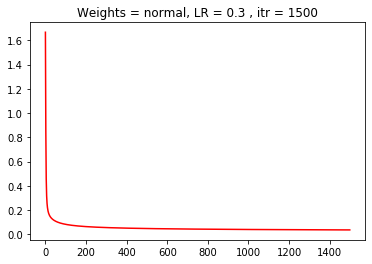

In [18]:
plt.title('Weights = normal, LR = 0.8 , itr = 1500')
plt.plot(list(range(iterations)), cost_history, '-r') #plot the cost function. 

In [19]:
theta

array([[-2.29962726],
       [-6.45186158],
       [-6.71484738],
       [-6.23766221],
       [ 0.26974827]])

In [20]:
y_predicted = predict(X_test,theta)
print("accuracy:" , accuracy(y_test , y_predicted))
print("precision:",precision(y_test , y_predicted))
print("recall:",recall(y_test , y_predicted))
print("f score:",f_score(y_test , y_predicted))

accuracy: 0.9890909090909091
precision: 0.9767441860465116
recall: 1.0
f score: 0.988235294117647


# Logistic Regression - with L1 regularisation

In [21]:
#different weight initialisations can be tried:

#1. initialise weights to zeroes
#theta=np.zeros((X.shape[1],1))

#2. gaussian
theta=np.random.randn(X.shape[1],1)

#3. uniform
#theta=np.random.uniform(-10,10,(X.shape[1],1))

#getting better results with lambda value close to 0
iterations=4500
learning_rate=0.04

theta_1,cost_history_1 = gradient_descent_regularisation(X_train,y_train,theta,learning_rate,iterations,lambda_=0.04,norm='L1')


#

In [22]:
cost_history_1


array([1.1034945 , 1.08851426, 1.07369582, ..., 0.38469981, 0.38473135,
       0.38472927])

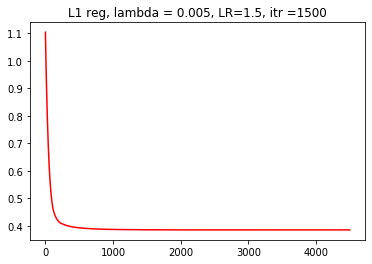

In [23]:
plt.title('L1 reg, lambda = 0.005, LR=1.5, itr =1500')
plt.plot(list(range(iterations)), cost_history_1, '-r') #plot the cost function. 

In [24]:
theta_1

array([[-7.15492571e-02],
       [-2.05221893e+00],
       [-1.42428452e+00],
       [-1.05048421e+00],
       [ 1.44240104e-03]])

In [25]:

y_predicted_1 = predict(X_test,theta_1)
print("accuracy:" , accuracy(y_test , y_predicted_1))
print("precision:",precision(y_test , y_predicted_1))
print("recall:",recall(y_test , y_predicted_1))
print("f score:",f_score(y_test , y_predicted_1))

accuracy: 0.96
precision: 0.9259259259259259
recall: 0.9920634920634921
f score: 0.9578544061302682


# Logistic Regression - with L2 regularisation

In [26]:
#different weight initialisations can be tried:

#1. initialise weights to zeroes
#theta=np.zeros((X.shape[1],1))

#2. gaussian
theta=np.random.randn(X.shape[1],1)

#3. uniform
#theta=np.random.uniform(-10,10,(X.shape[1],1))


iterations=5500
learning_rate=0.04


theta_2,cost_history_2 = gradient_descent_regularisation(X_train,y_train,theta,learning_rate,iterations,lambda_=0.0005,norm='L2')

#

In [27]:
cost_history_2

array([1.19512393, 1.17903351, 1.163203  , ..., 0.07344033, 0.07343774,
       0.07343516])

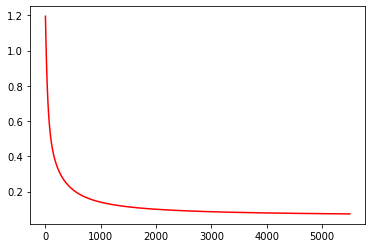

In [28]:
plt.plot(list(range(iterations)), cost_history_2, '-r') #plot the cost function. 

In [29]:
theta_2

array([[-0.97749224],
       [-4.15519159],
       [-3.76333521],
       [-3.56963936],
       [ 0.32081558]])

In [30]:

y_predicted_2 = predict(X_test,theta_2)
print(accuracy(y_test , y_predicted_2))
print(precision(y_test, y_predicted_2))
print(recall(y_test, y_predicted_2))
print(f_score(y_test , y_predicted_2))

0.9818181818181818
0.9618320610687023
1.0
0.9805447470817121
